In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltfrom 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score



In [3]:
data=pd.read_csv(r"C:\Users\ABRAHAM\Desktop\LifeExpectancy.csv")

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data.dropna(inplace=True)

In [6]:
data.shape

(1649, 22)

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<AxesSubplot:>

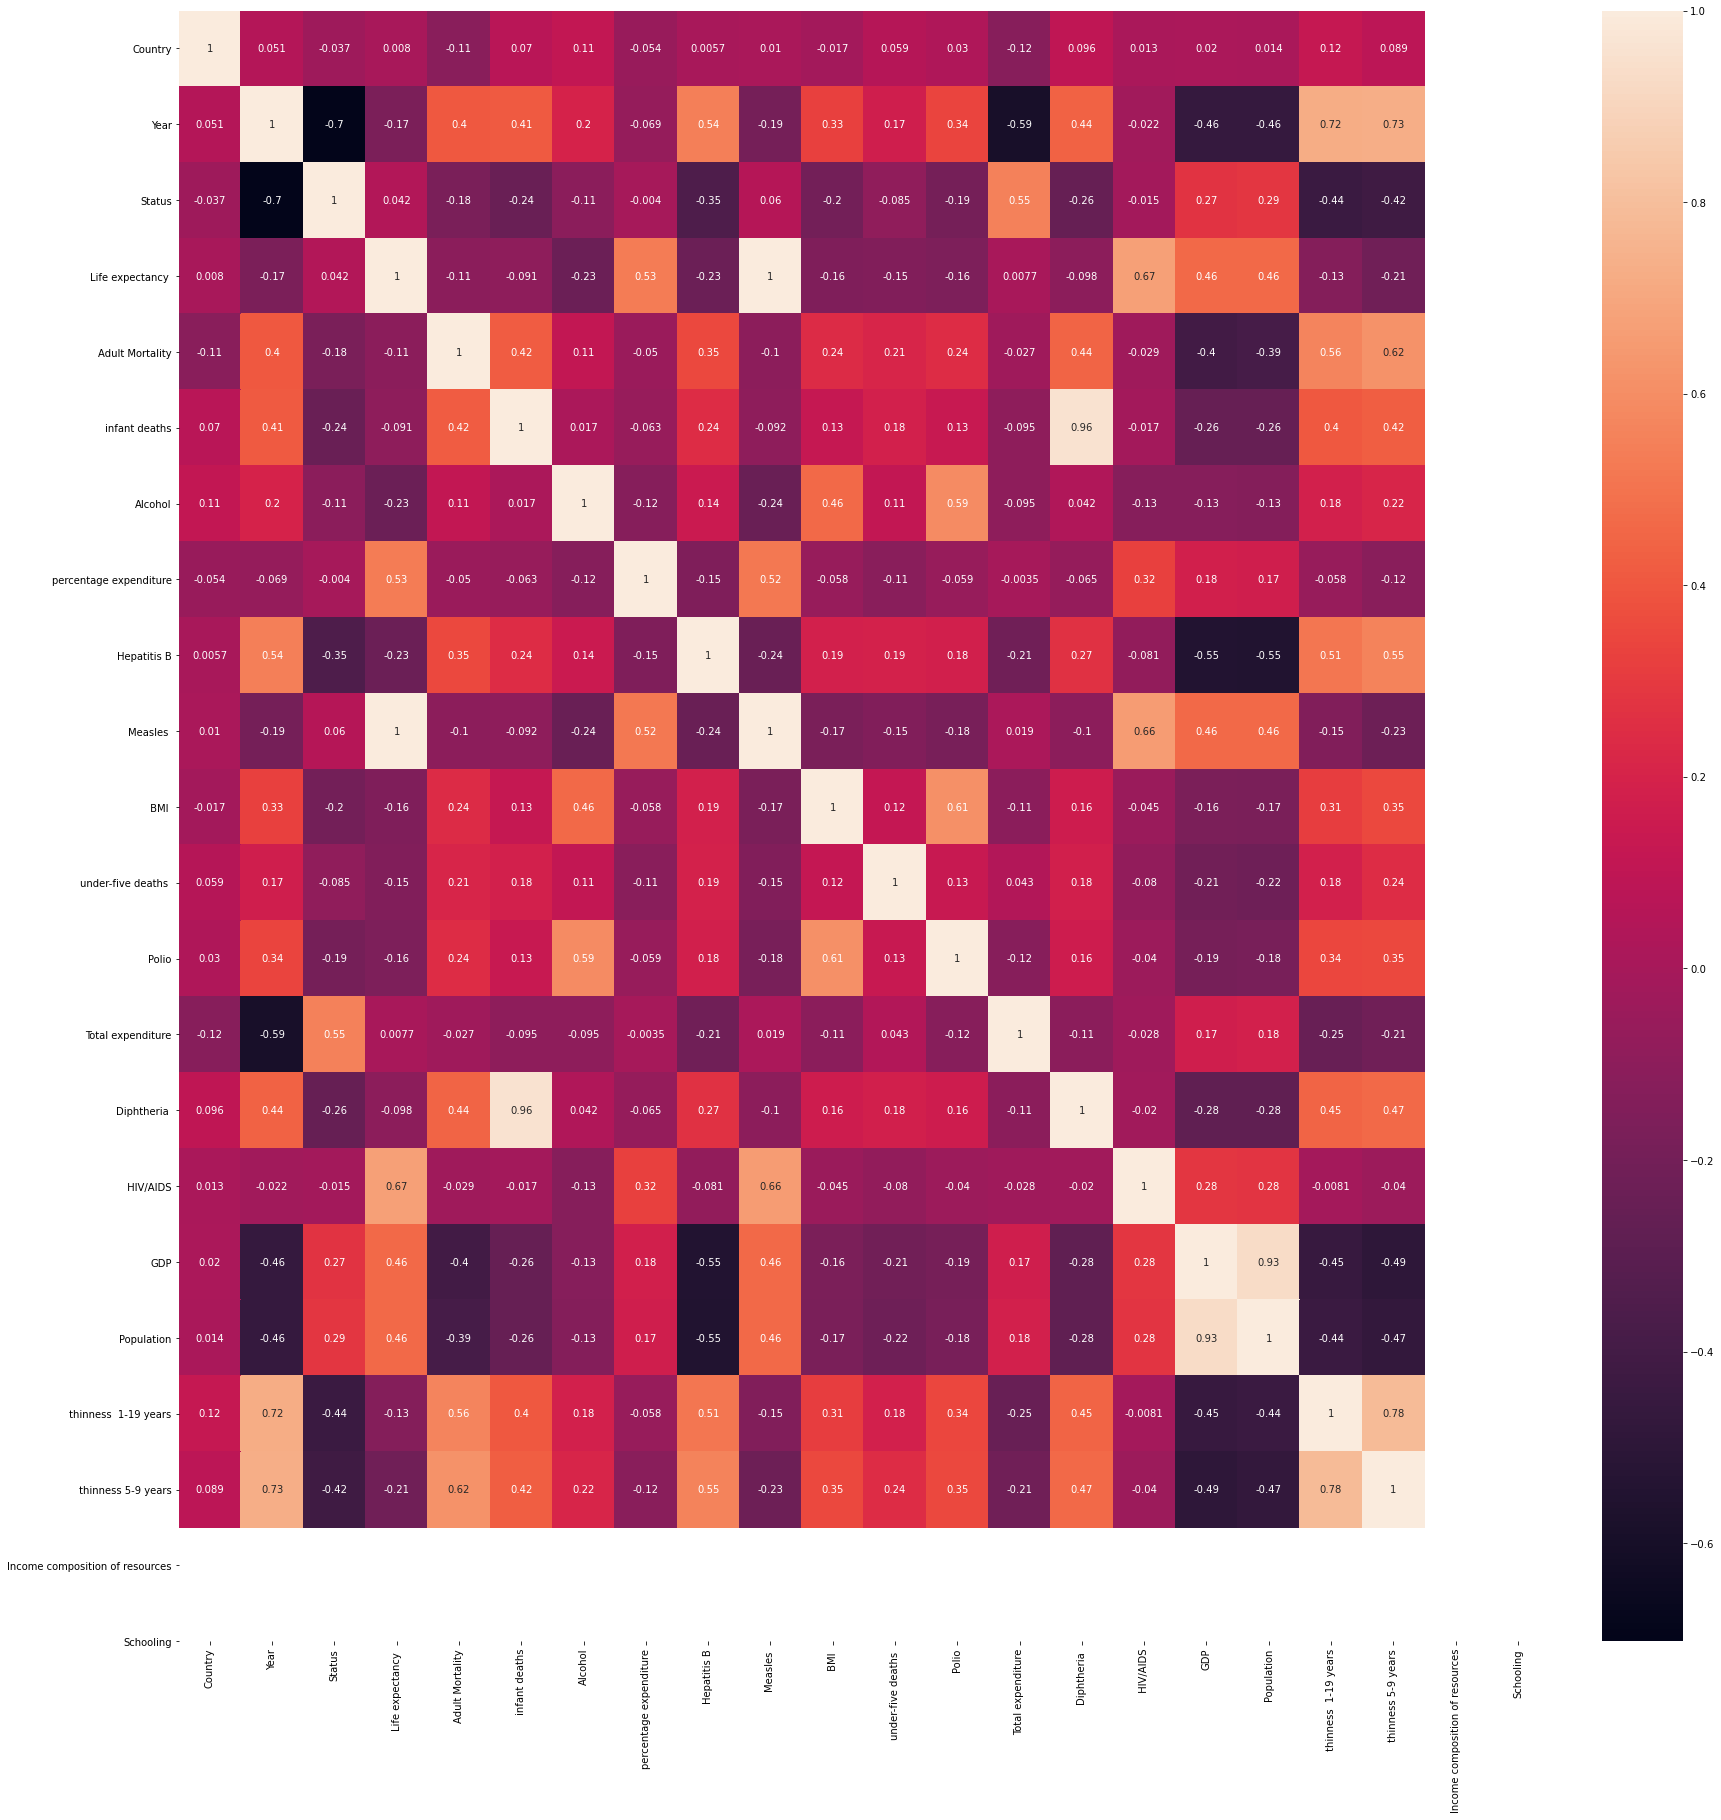

In [9]:
correlation = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation,xticklabels=data.columns,yticklabels=data.columns,annot=True)

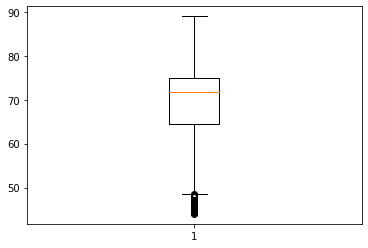

In [10]:
#Box plot

plt.boxplot(data['Life expectancy '])
plt.show()

In [11]:
data = data.drop(["Country","Year","Status"],axis=1)

In [12]:
x=data[['Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B','Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling']]
y= data['Life expectancy ']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(x_train,y_train)

predict = model.predict(x_test)

print("predict on test data :",predict)

print("r2_score", r2_score(y_test,predict))

predict on test data : [59.84192141 76.97677327 71.77245225 56.24466054 61.95644841 83.60886178
 49.5608046  62.04467959 41.97441986 73.85303121 76.65264338 75.17778522
 78.01953592 71.1246637  83.55150327 45.5184039  46.73510327 69.25201001
 73.72086231 68.40482025 80.70143318 71.38867341 65.22957045 74.07284864
 71.65233054 61.78025496 64.52003424 53.97603437 77.06688461 71.90720061
 70.12752507 51.62887431 60.69982127 70.93013797 72.12148689 71.240598
 71.06228665 78.58708595 77.74636459 50.81924502 79.24797685 62.79711824
 75.90118591 73.51762625 88.98802029 79.61734733 55.03347025 71.15042387
 71.01661801 81.28032185 65.24949516 69.60351789 57.0024579  77.54854307
 67.1637713  77.40067501 73.23931165 75.76640243 69.4967191  67.02339777
 73.10635204 68.83547719 67.27069608 77.55844283 75.64184223 80.65950017
 70.12750285 69.29972767 72.16833113 72.11057698 68.18669307 83.11995228
 43.12300265 82.19479909 79.44915997 63.3115543  76.10070445 77.30243
 65.64692893 67.164681   62.62769

In [14]:
predict_train_data = model.predict(x_train)
print("predict on train data:", predict_train_data)

print('r_2score', r2_score(y_train,predict_train_data))

predict on train data: [63.68418349 70.79089788 72.79907408 ... 74.54268578 72.59966269
 71.6439017 ]
r_2score 0.8287667484554812


In [15]:
print("coef of model :", model.coef_)
print("intercept:",model.intercept_)

coef of model : [-1.79391448e-02  8.22976820e-02 -5.23700205e-02  4.17527757e-04
 -4.94642292e-03 -2.02362136e-06  3.96459166e-02 -6.19111280e-02
  6.17736677e-03  9.11521776e-02  1.59192208e-02 -4.33970624e-01
  1.03554146e-05 -8.07962471e-10 -7.15581606e-03 -3.09543462e-02
  8.91449995e+00  9.21944008e-01]
intercept: 53.019080826343966
